# Customer Clustering with KMeans to Boost Business Strategy
In this notebook it will be showned how to use the KMeans algorithm (unsupervised machine learning) to cluster customer data.


In [1]:
## Installing Required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D


### Exploring the data

In [2]:
#Loading the data in a csv file into a dataframe.
df_sst = pd.read_csv('Wholesale customers data.csv')

#First five rows is showned
df_sst.head(5)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
print(df_sst.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [4]:
#Showing the shape of the dataset.
df_sst.shape

(440, 8)

In [5]:
#Dropping columns 'Channel' and 'Region'
df_sst.drop(columns=['Channel', 'Region'], inplace= True)

### Preprocessing data using different scalers

In [6]:
# scale minimun and maximun
data_min_max = preprocessing.MinMaxScaler().fit_transform(df_sst)
data_min_max

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

In [7]:
# Normalization of the data.
data_normalizer = preprocessing.Normalizer().transform(df_sst.T)
data_normalizer = data_normalizer.T
data_normalizer

array([[0.034663  , 0.04908746, 0.02911003, 0.00177727, 0.02290171,
        0.01991374],
       [0.0193083 , 0.04987034, 0.03683703, 0.01463339, 0.02820319,
        0.02643259],
       [0.01738212, 0.04477655, 0.02958358, 0.0199735 , 0.03011309,
        0.11674394],
       ...,
       [0.03975752, 0.07873515, 0.11643627, 0.00362928, 0.12710706,
        0.02778696],
       [0.02815394, 0.01007066, 0.00859325, 0.00862058, 0.00143885,
        0.03162683],
       [0.00762537, 0.00863199, 0.00966356, 0.00053982, 0.00408531,
        0.00077393]])

In [8]:
# Standard scaler
data_standard_scaler = preprocessing.StandardScaler().fit_transform(df_sst)
data_standard_scaler

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [9]:
data_robust_scaler = preprocessing.RobustScaler().fit_transform(df_sst)
data_robust_scaler

array([[ 0.30168043,  1.06571214,  0.32995207, -0.46657183,  0.50678671,
         0.2638102 ],
       [-0.1048095 ,  1.09293385,  0.56599336,  0.08392603,  0.67567015,
         0.5740085 ],
       [-0.15580183,  0.91581599,  0.34441798,  0.3125889 ,  0.73651183,
         4.87145892],
       ...,
       [ 0.43654933,  2.09660171,  2.99755961, -0.38726885,  3.826342  ,
         0.63845609],
       [ 0.12936404, -0.29095409, -0.29678633, -0.17354196, -0.176932  ,
         0.82117564],
       [-0.41409532, -0.34097839, -0.26409103, -0.51955903, -0.0926267 ,
        -0.64695467]])

### Plotting data

In [10]:

# Convert numpy array to DataFrames for plotting
#data_min_max = pd.Dataframe(data_min_max)
#data_normalizer = pd.Dataframe(data_)
#data_standard_scaler = pd.Dataframe(data_)
#data_robust_scaler = pd.Dataframe(data_)

### Creating a function for deciding which scaler is better according to the data distribution



In [17]:
def analyze_scaling_needs(data: pd.DataFrame):
    results = {}
    fig, axes = plt.subplots(len(data.columns), 3, figsize=(15, 5*len(data.columns)))
    
    # Calculate global x-axis limits
    global_min = min(data[col].min() for col in data.columns)
    global_max = max(data[col].max() for col in data.columns)
    x_range = (global_min, global_max)
    
    for idx, column in enumerate(data.columns):
        values = data[column].values
        
        # 1. Checking outliers
        q1 = np.percentile(values, 25)
        q2 = np.percentile(values, 50)  # median
        q3 = np.percentile(values, 75)
        iqr = q3 - q1
        outlier_bounds = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
        outliers = np.sum((values < outlier_bounds[0]) | (values > outlier_bounds[1]))
        
        # 2. Test for normality - fixing the unpacking
        statistic, normality_p_value = stats.normaltest(values)
        
        # 3. Check value range
        value_range = values.max() - values.min()
        
        # Histogram with percentile lines
        sns.histplot(data, x=column, ax=axes[idx, 0])
        axes[idx, 0].axvline(q1, color='r', linestyle='--', label='25th percentile')
        axes[idx, 0].axvline(q2, color='g', linestyle='--', label='50th percentile')
        axes[idx, 0].axvline(q3, color='b', linestyle='--', label='75th percentile')
        axes[idx, 0].set_title(f'{column} Distribution')
        axes[idx, 0].set_xlim(x_range)
        axes[idx, 0].legend()
        
        # Box plot
        sns.boxplot(data, x=column, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'{column} Box Plot')
        axes[idx, 1].set_xlim(x_range)
        
        # Q-Q plot
        stats.probplot(values, dist="norm", plot=axes[idx, 2])
        axes[idx, 2].set_title(f'{column} Q-Q Plot')
        
        # Storing analysis results
        results[column] = {
            'has_outliers': outliers > 0,
            'outlier_count': outliers,
            'is_normal': normality_p_value > 0.05,
            'value_range': value_range,
            'skewness': stats.skew(values),
            'percentiles': {
                '25th': q1,
                '50th': q2,
                '75th': q3
            }
        }
    
    plt.tight_layout()
    plt.show()
    
    # Print recommendations and percentiles
    print("\nScaling Recommendations:")
    print("-----------------------")
    for column in data.columns:
        print(f"\nColumn: {column}")
        r = results[column]
        
        print(f"Percentiles:")
        print(f"  25th: {r['percentiles']['25th']:.2f}")
        print(f"  50th: {r['percentiles']['50th']:.2f}")
        print(f"  75th: {r['percentiles']['75th']:.2f}")
        
        if r['has_outliers'] and r['outlier_count'] > len(data.columns) * 0.01:
            print("✓ RobustScaler recommended due to significant outliers")
        
        if r['is_normal']:
            print("✓ StandardScaler suitable due to normal distribution")
        
        if r['value_range'] > 10:
            print("✓ MinMaxScaler could be useful for large value ranges")
            
        if abs(r['skewness']) > 2:
            print("✓ Consider log transformation before scaling")
    
    return results

In [18]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_sst)

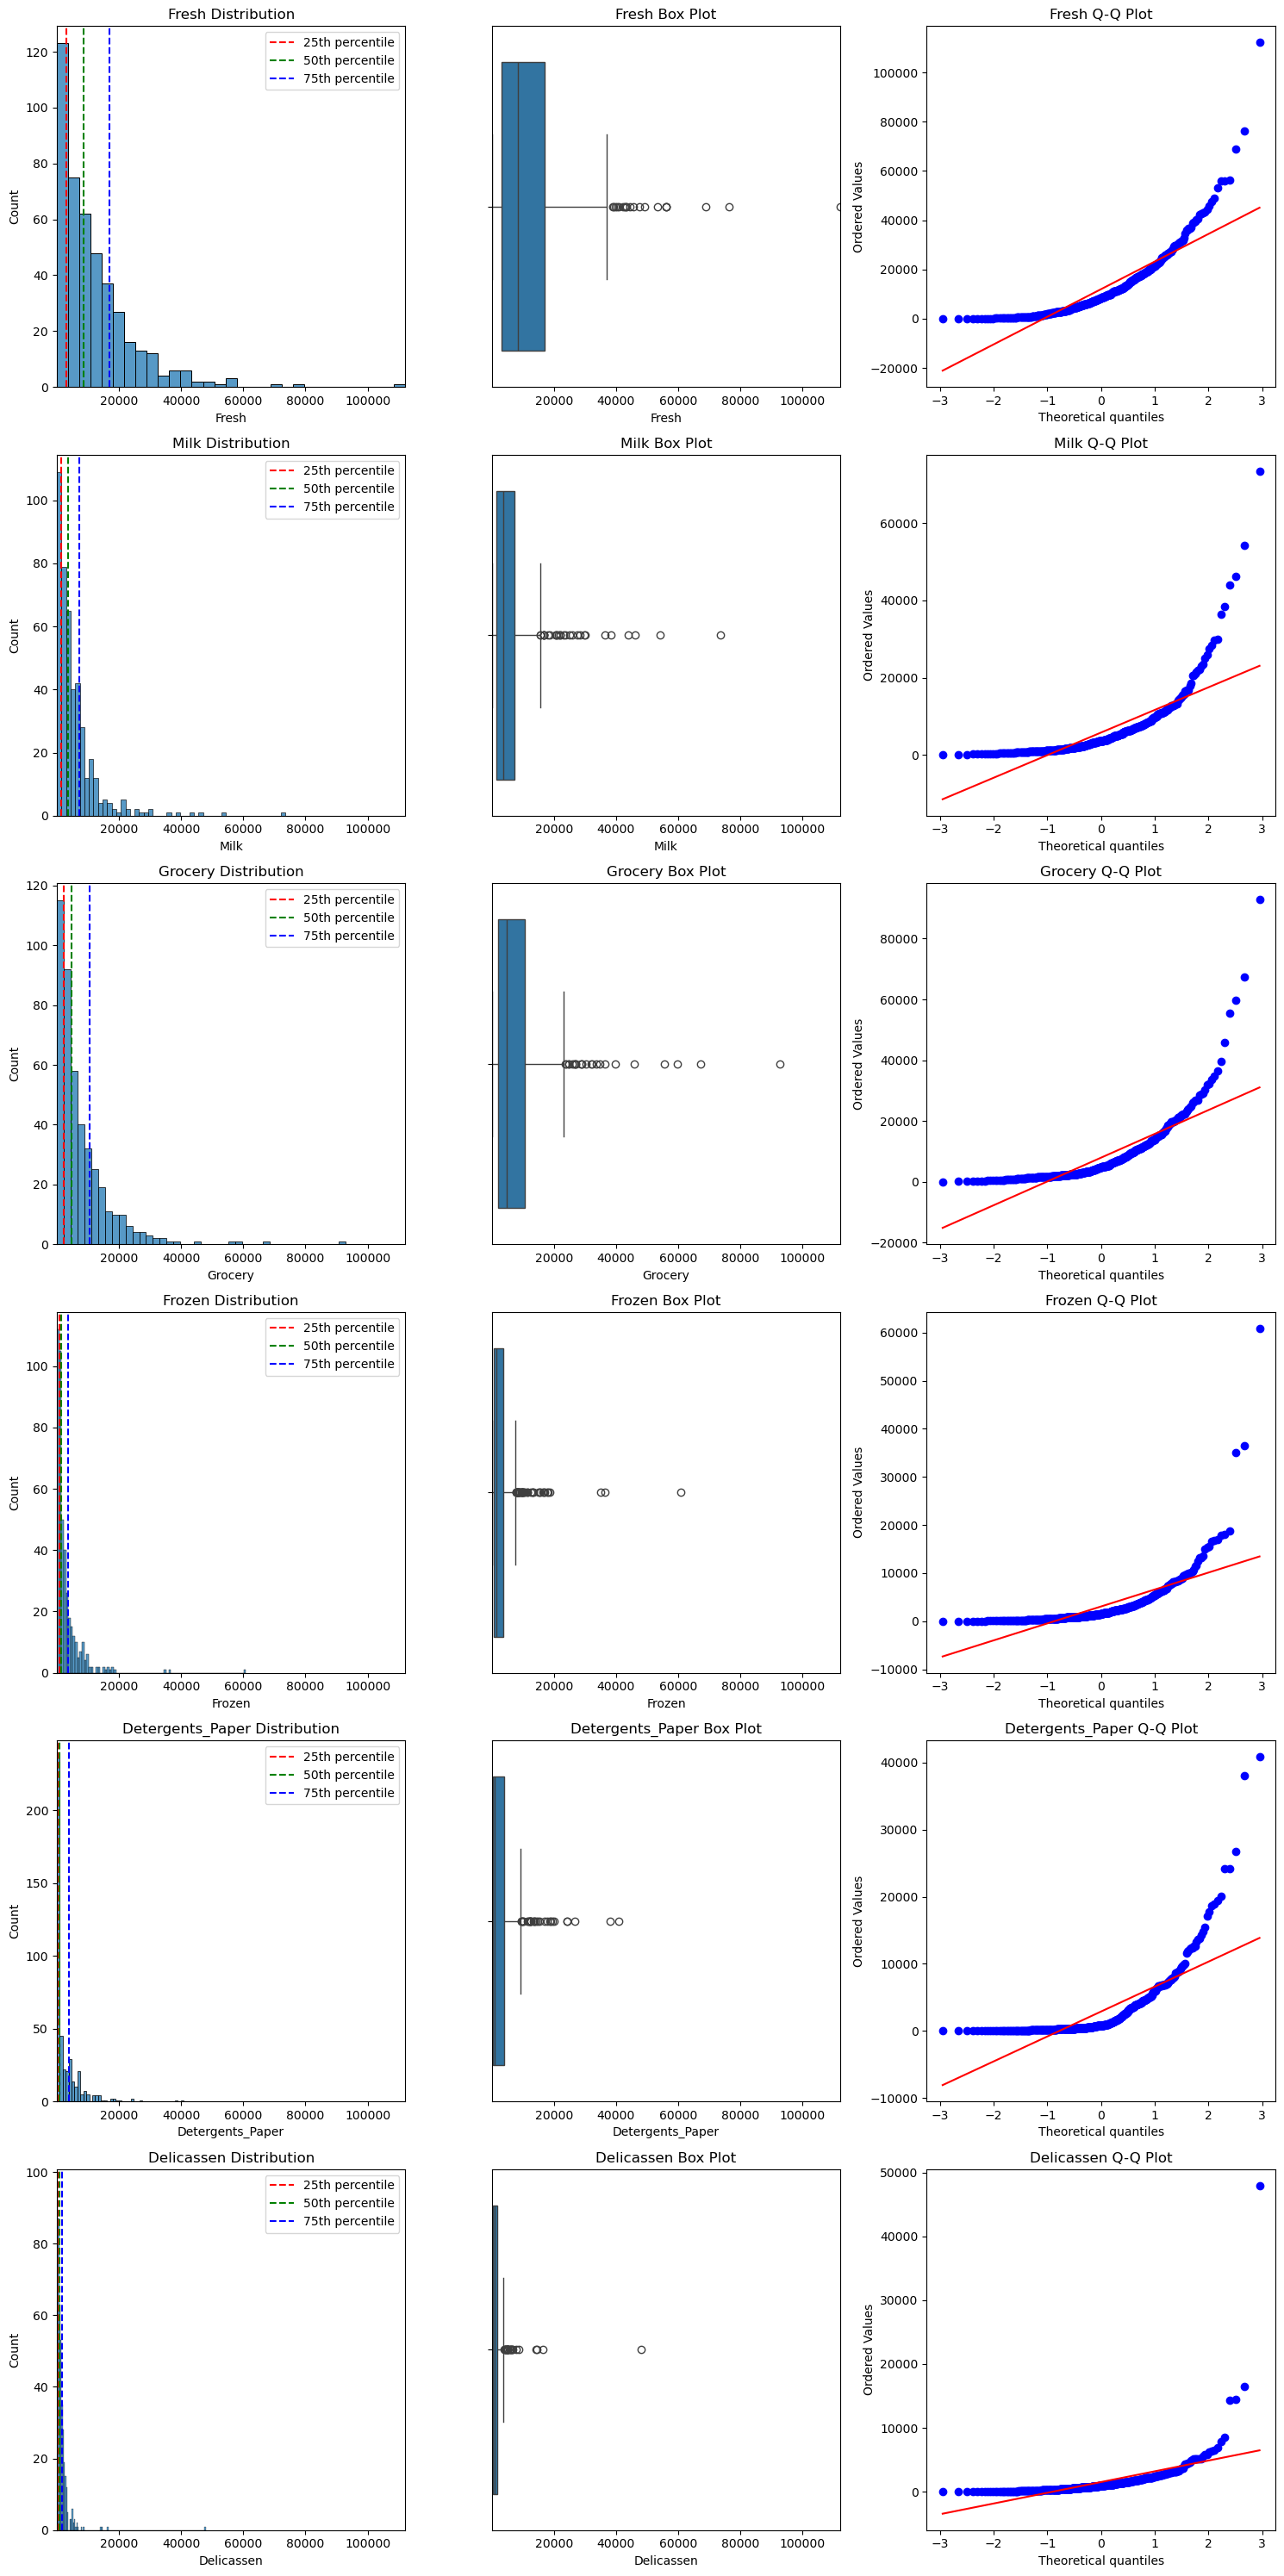


Scaling Recommendations:
-----------------------

Column: Fresh
Percentiles:
  25th: 3127.75
  50th: 8504.00
  75th: 16933.75
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler could be useful for large value ranges
✓ Consider log transformation before scaling

Column: Milk
Percentiles:
  25th: 1533.00
  50th: 3627.00
  75th: 7190.25
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler could be useful for large value ranges
✓ Consider log transformation before scaling

Column: Grocery
Percentiles:
  25th: 2153.00
  50th: 4755.50
  75th: 10655.75
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler could be useful for large value ranges
✓ Consider log transformation before scaling

Column: Frozen
Percentiles:
  25th: 742.25
  50th: 1526.00
  75th: 3554.25
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler could be useful for large value ranges
✓ Consider log transformation before scaling

Column: Detergents_Paper
P

In [19]:
columns_to_analyze = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
results = analyze_scaling_needs(df_sst)


In [12]:
# Que todos los plots de distribución estèn en el mismo rango del eje x, y agregar lìneas verticales punteadas con los percentiles: 25, 50, 75.
def analyze_scaling_needs(data:pd.DataFrame):
    
    results = {}
    fig, axes = plt.subplots(len(data.columns), 3, figsize=(15, 5*len(data.columns)))
    
    for idx, column in enumerate(data.columns):
        values = data[column].values
        
    # 1. Checking outliers
        q1 = np.percentile(values, 25)
        q3 = np.percentile(values, 75)
        iqr = q3 - q1
        outlier_bounds = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
        outliers = np.sum((values < outlier_bounds[0]) | (values > outlier_bounds[1]))
    
    # 2. Test for normality
        _, normality_p_value = stats.normaltest(values)
    
    # 3. Check value range
        value_range = values.max() - values.min()
    
    # Visualizations
    # Histogram
        sns.histplot(data, x=column, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'{column} Distribution')
    
    # Box plot
        sns.boxplot(data, x=column, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'{column} Box Plot')
    
    # Q-Q plot
        stats.probplot(values, dist="norm", plot=axes[idx, 2])
        axes[idx, 2].set_title(f'{column} Q-Q Plot')
          
    # Storing analysis results
        results[column] = {
        'has_outliers': outliers > 0,
        'outlier_count': outliers,
        'is_normal': normality_p_value > 0.05,
        'value_range': value_range,
        'skewness': stats.skew(values)
    }
    
    plt.tight_layout()
    plt.show()
    
    # Print recommendations
    print("\nScaling Recommendations:")
    print("-----------------------")
    for column in data.columns:
        print(f"\nColumn: {column}")
        r = results[column]
        
        if r['has_outliers'] and r['outlier_count'] > len(data.columns) * 0.01:
            print("✓ RobustScaler recommended due to significant outliers")
        
        if r['is_normal']:
            print("✓ StandardScaler suitable due to normal distribution")
        
        if r['value_range'] > 10:
            print("✓ MinMaxScaler could be useful for large value ranges")
            
        if abs(r['skewness']) > 2:
            print("✓ Consider log transformation before scaling")
    
    return results


In [31]:
# You can then apply the recommended scaler
# For example, if RobustScaler was recommended:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_sst)

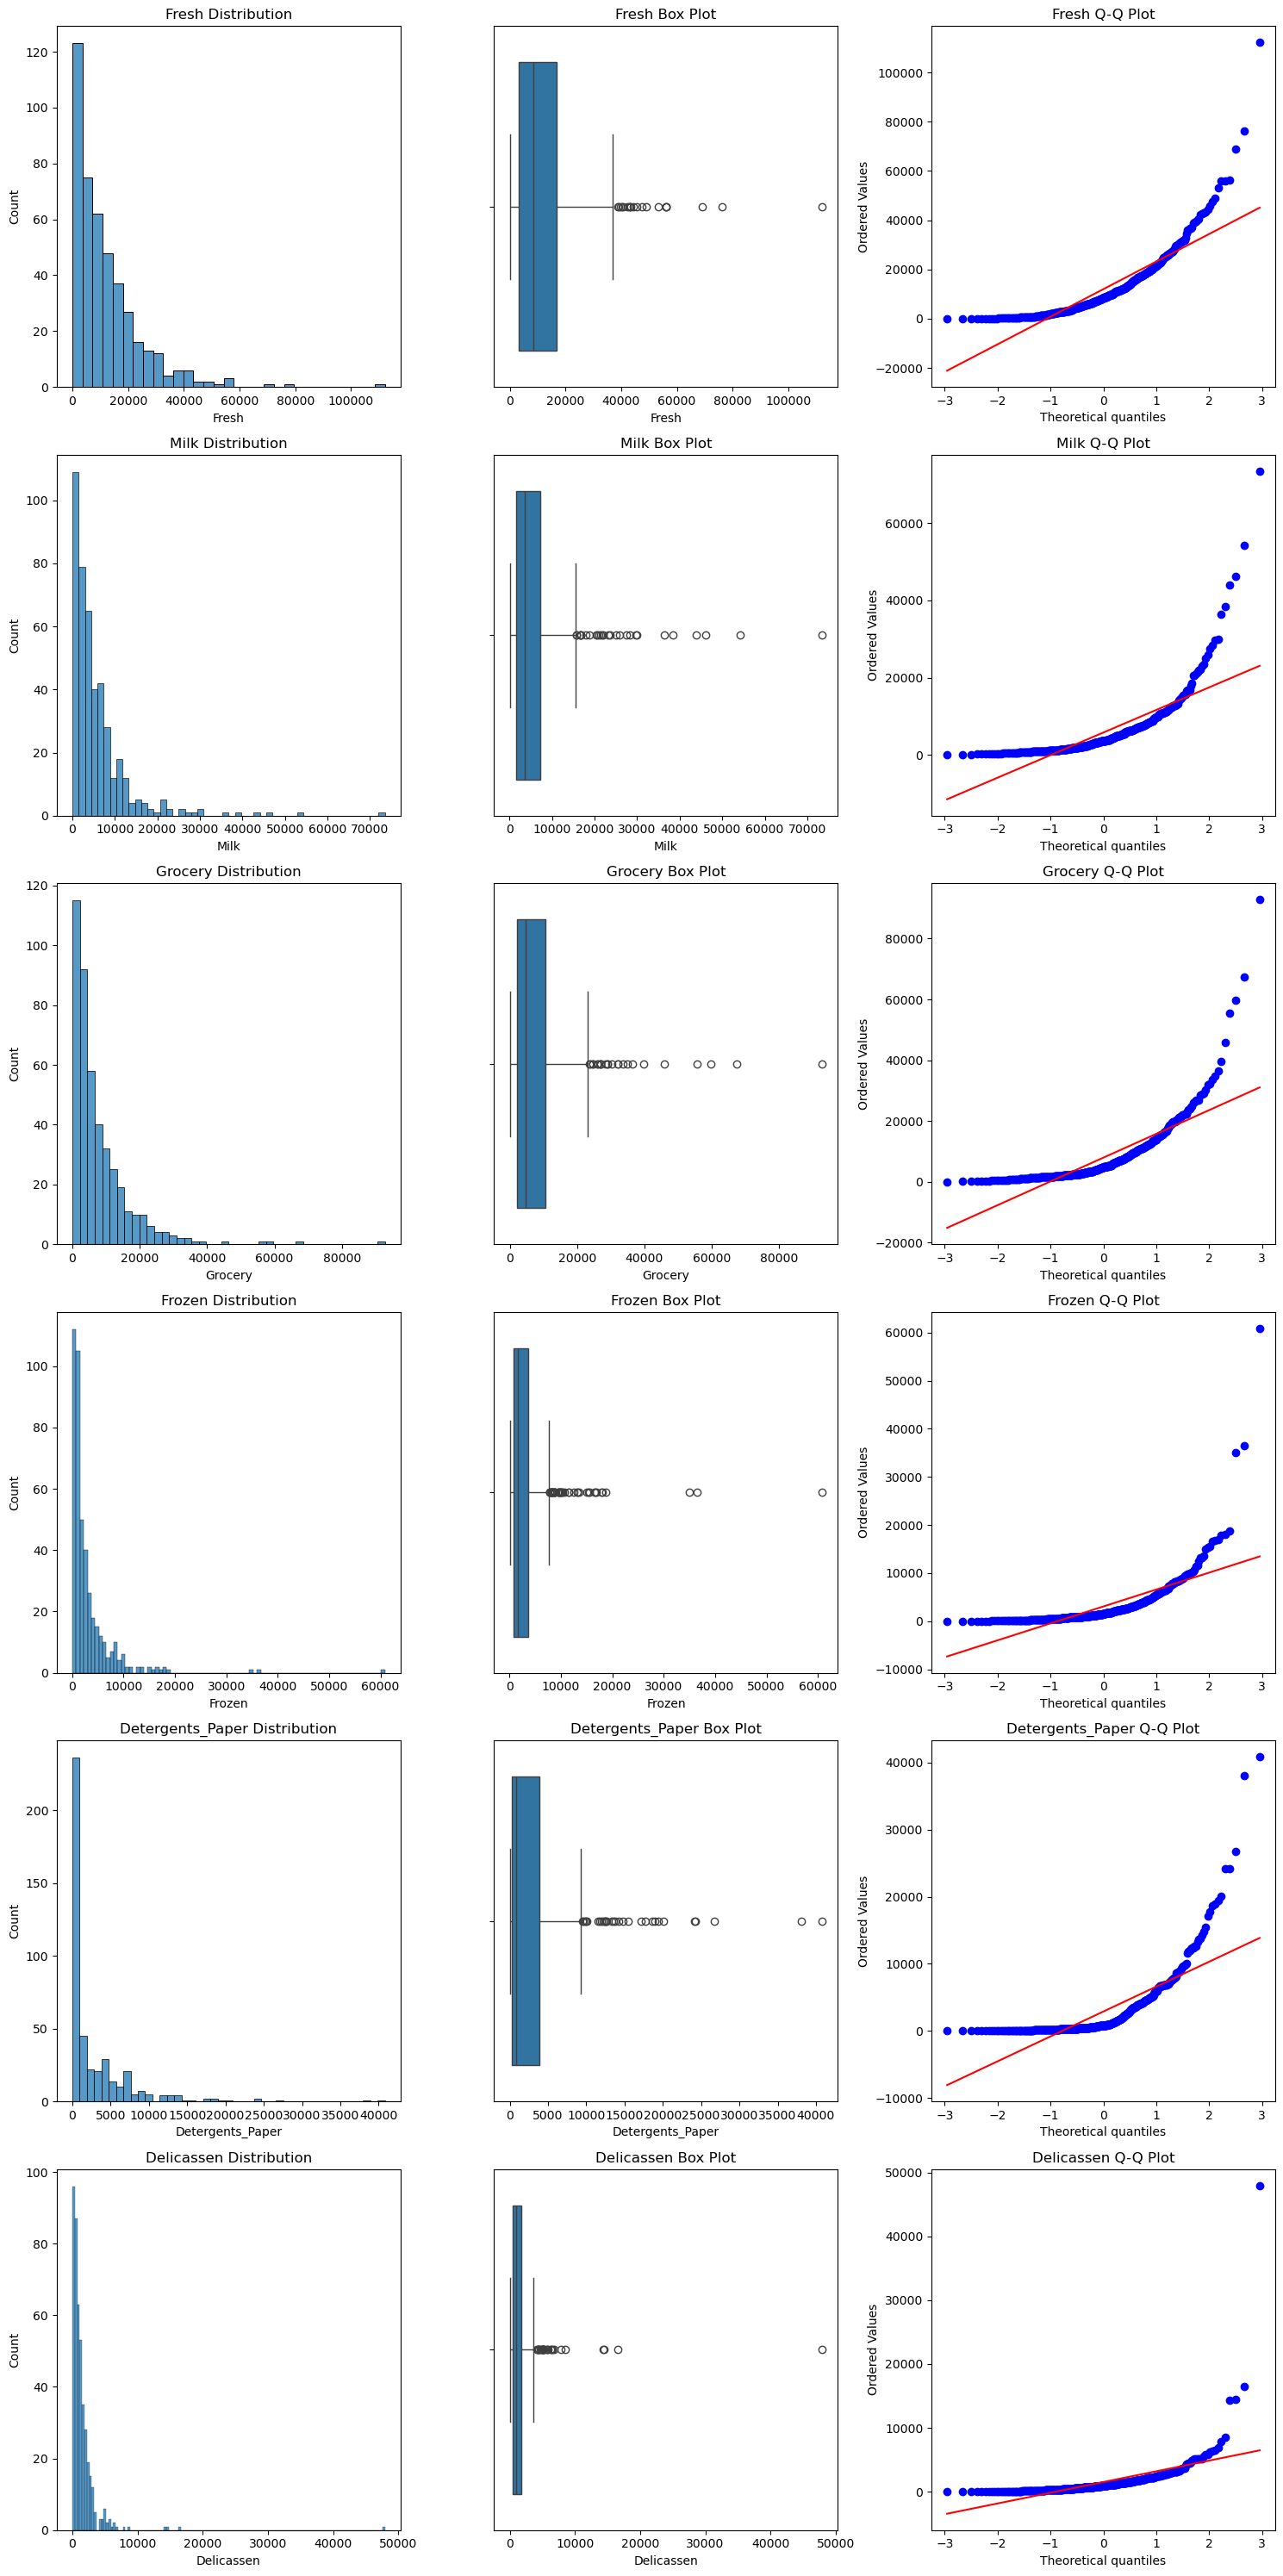


Scaling Recommendations:
-----------------------

Column: Fresh
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler could be useful for large value ranges
✓ Consider log transformation before scaling

Column: Milk
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler could be useful for large value ranges
✓ Consider log transformation before scaling

Column: Grocery
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler could be useful for large value ranges
✓ Consider log transformation before scaling

Column: Frozen
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler could be useful for large value ranges
✓ Consider log transformation before scaling

Column: Detergents_Paper
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler could be useful for large value ranges
✓ Consider log transformation before scaling

Column: Delicassen
✓ RobustScaler recommended due to significant outliers
✓ MinMaxScaler co

In [32]:
columns_to_analyze = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
results = analyze_scaling_needs(df_sst)


### Deciding how many clusters to create using "Elbow method"

/home/andy/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/andy/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/andy/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/andy/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

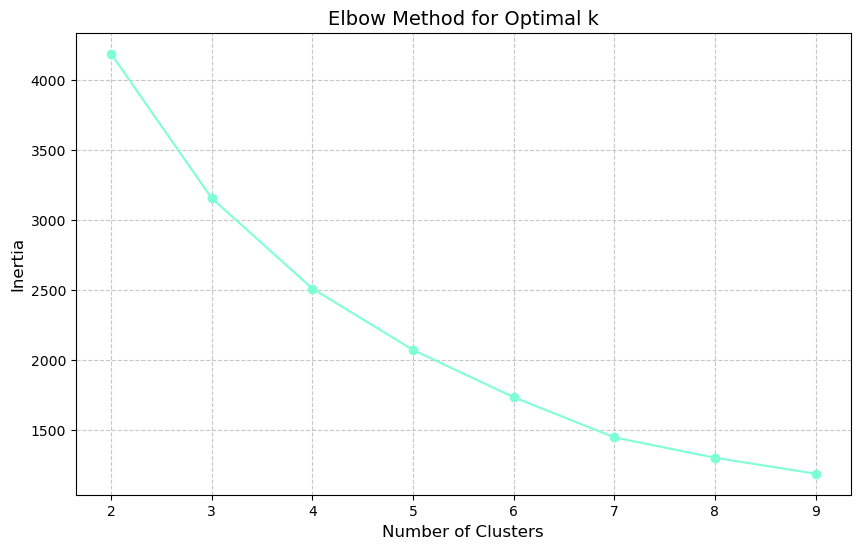

In [33]:
# Standardize the features
scaler = RobustScaler()
# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df_sst), columns=df_sst.columns)

# Calculate inertia for different numbers of clusters
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10,6), dpi=100)
plt.plot(range(2,10), inertia, marker="o", color="aquamarine")
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.title("Elbow Method for Optimal k", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In conclution our k for the model is 4.

In [34]:
number_of_clusters = 4

In [35]:
#Create a KMeans clustering model.
cluster = KMeans(n_clusters = number_of_clusters)

#Determing the value of the parameter 'n_init' for future changes 
kmeans = KMeans(n_init='auto')

In [36]:
#Training the model. 
result = cluster.fit_transform(df_sst)

/home/andy/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
#TODO plottear esto

#bajar a dimensión 2 para poder verlos (usar PSA)

#Cluster centers are printed.
cluster.cluster_centers_

array([[ 4808.84210526, 10525.01052632, 16909.78947368,  1462.58947368,
         7302.4       ,  1650.88421053],
       [19888.27272727, 36142.36363636, 45517.45454545,  6328.90909091,
        21417.09090909,  8414.        ],
       [36144.48275862,  5471.46551724,  6128.79310345,  6298.65517241,
         1064.        ,  2316.72413793],
       [ 9087.46376812,  3027.42753623,  3753.51449275,  2817.98550725,
         1003.00362319,  1040.52536232]])

### Making Predictions

In [38]:
#Ckecking columns name.
df_sst.columns.tolist()

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [39]:
#Making predictions and saving them into the column "cluster_number".
df_sst['cluster_number'] = cluster.predict(df_sst)
df_sst.sample(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_number
73,19899,5332,8713,8132,764,648,3
166,4822,6721,9170,993,4973,3637,0
209,5550,12729,16767,864,12420,797,0
17,5876,6157,2933,839,370,4478,3
259,53205,4959,7336,3012,967,818,2


In [40]:
#Printing the cluster numbers and the number of customers in each cluster.
df_sst.cluster_number.value_counts()

cluster_number
3    276
0     95
2     58
1     11
Name: count, dtype: int64

In [52]:
#TODO usar reducción de dimensionalidad, por ejemplo el PSA

#Investigar el método de la silueta

#
# Generate sample data for clusterinG
X, y = make_blobs(n_samples=20, 
                  centers=4, 
                  cluster_std=0.6, 
                  random_state=0)

In [51]:
X


array([[ 4.25900607, -9.63622754,  9.37963115],
       [ 4.05081806, -9.70793078,  9.47944963],
       [-2.5557706 ,  9.03848236,  4.44855081],
       [ 1.83069487, -6.93406546, -6.86901733],
       [-2.47777289,  8.92348372,  4.49864847],
       [ 4.22261918, -9.48521016,  9.49132506],
       [ 1.94400031, -6.93979785, -6.69488177],
       [-8.82119093,  7.31195809,  1.99218987],
       [ 4.0775298 , -9.61923135,  9.43132339],
       [ 1.97181996, -6.98539828, -6.7978551 ],
       [-8.97114636,  7.34320904,  2.09614689],
       [-8.98617996,  7.25153849,  1.97623636],
       [ 1.85807033, -6.84205739, -6.94017346],
       [ 1.85108532, -6.85874083, -7.07607661],
       [ 4.29707556, -9.59551113,  9.49855033],
       [-2.55614506,  9.06854213,  4.59353707],
       [-2.68168941,  8.95805738,  4.53859572],
       [-8.73261553,  7.35788474,  1.84599622],
       [-8.80591936,  7.28501469,  1.95460803],
       [-2.36263275,  8.9917085 ,  4.64663166]])

In [50]:
X.shape


(20, 3)

In [46]:
# Apply k-means clustering
cluster.fit(X)

/home/andy/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

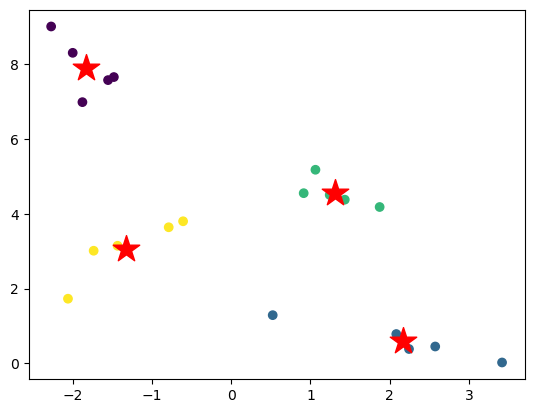

In [47]:
# Plotting the clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap='viridis')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker='*', s=400, color='r')
plt.show()

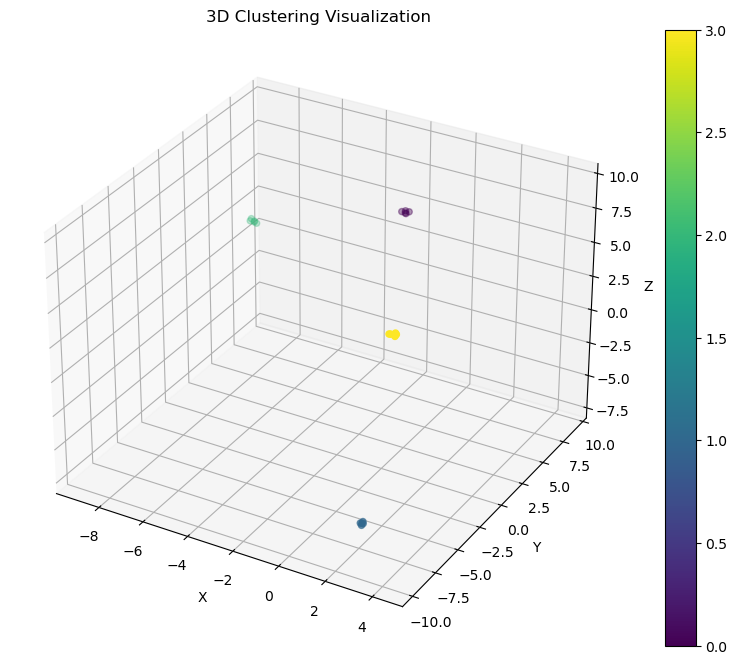

In [48]:
#Bonus: plotting cluster in 3D
X, y = make_blobs(n_samples=20,
                n_features= 3,
                 centers=4, 
                 cluster_std=0.1, 
                 random_state=42)

#Creating 3D scatter plot
fig = plt. figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

#Plotting the points
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],
                     c=y,
                     cmap='viridis'
                     )

#Adding labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Clustering Visualization')

#Adding a color bar
plt.colorbar(scatter)

#Showing the plot
plt.show()
